# Introduction

## "Cleaning “Messy” Data"

This assignment involves cleaning a wine dataset of 12,700 entries, addressing data integrity and usability issues for analysis.

Team members :
- Mahesh Rajendra
- Bhavitha Bojja
- Mamatha Singh
- Nandini Srirapu

## Plan / Methodolgy
This assignment is structured into four phases: Data Acquisition, Pre-Data Preparation EDA, Data Preparation, Post-Data Preparation EDA and Conclusion.

1. **Data Acquisition** : The data in CSV format is retrieved from GitHub.

2. **Pre-Data Preparation EDA** : In this phase, the uncleaned data is analyzed through univariate and bivariate analysis, exploring statistical and visual patterns, ploted histograms and box plot to see the distribution of numerical data and count plots for catogorical data. Also ploted heatmap, bar chats and violen plots to see relations of variables.

3. **Data Preparation** :

- In this phase, irrelevant columns like 'Unnamed: 0' and 'INDEX' are dropped as they hold no influence on the analysis.

- **KNN Imputer** is applied to handle missing values effectively.

- Outliers in numerical columns are removed by identifying and considering the upper and lower bounds of the interquartile range (IQR).

4. **Post-Data Preparation EDA** :
In this phase, the cleaned data is re-analyzed through univariate and bivariate analysis, examining statistical and visual patterns. Histograms and box plots are used to observe the distribution of numerical data, while count plots are applied for categorical data. Additionally, heatmaps, bar charts, and violin plots are generated to explore the relationships between variables after data cleaning.

5. Conclusion:
Compared the pre- and post-data preparation EDAs, ensuring that the data is now ready for modeling without any data integrity or usability issues.

## Data Summery
The dataset contains information on over 12,700 wines, with several attributes related to the chemical composition and quality of the wines. Below is an overview of the key attributes:

- INDEX: Unique identifier for each wine entry.
- TARGET: Response variable indicating the number of wine cases sold.
- AcidIndex: Measures the total acidity of the wine via a weighted average.
- Alcohol: Alcohol content in the wine.
- Chlorides: Chloride content in the wine.
- CitricAcid: Citric acid content in the wine.
- Density: Density of the wine.
- FixedAcidity: Fixed acidity of the wine.
- FreeSulfurDioxide: Content of free sulfur dioxide in the wine.
- LabelAppeal: A subjective marketing score indicating the appeal of the wine bottle's label design.
- ResidualSugar: Residual sugar content in the wine.
- STARS: Wine rating determined by experts (1 = poor, 4 = excellent).
- Sulphates: Sulfate content in the wine.
- TotalSulfurDioxide: Total sulfur dioxide content in the wine.
- VolatileAcidity: Volatile acid content in the wine.
- pH: pH level of the wine.







## Data Acquition

In [281]:
# import library
import pandas as pd

In [282]:
# get dataset link in varible
dataset_url = "https://raw.githubusercontent.com/Rajendramahesh/Analytical-programing-datasets/refs/heads/main/Wine%20dataset.csv"

# load dataset
df = pd.read_csv(dataset_url)

In [283]:
df.head(10)

,Unnamed: 0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0,1,3,3.2,1.160,0.98,54.20,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,1,2,3,4.5,0.160,0.81,26.10,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,2,4,5,7.1,2.640,0.88,14.80,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5,3,5.7,0.385,0.04,18.80,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,6,4,8.0,0.330,1.26,9.40,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0
5,5,7,0,11.3,0.320,0.59,2.20,0.556,37.0,15.0,0.99940,3.20,1.29,15.4,0,11,NaN
6,6,8,0,7.7,0.290,0.40,21.50,0.060,287.0,156.0,0.99572,3.49,1.21,10.3,0,8,NaN
7,7,11,4,6.5,1.220,0.34,1.40,0.040,523.0,551.0,1.03236,3.20,NaN,11.6,1,7,3.0
8,8,12,3,14.8,0.270,1.05,11.25,0.007,213.0,NaN,0.99620,4.93,0.26,15.0,0,6,NaN
9,9,13,6,5.5,0.220,0.39,1.80,0.277,62.0,180.0,0.94724,3.09,0.75,12.6,0,8,4.0


# Pre-Data Preparation EDA

## Univariate

In [284]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns

In [285]:
# demographics of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          12795 non-null  int64  
 1   INDEX               12795 non-null  int64  
 2   TARGET              12795 non-null  int64  
 3   FixedAcidity        12795 non-null  float64
 4   VolatileAcidity     12795 non-null  float64
 5   CitricAcid          12795 non-null  float64
 6   ResidualSugar       12179 non-null  float64
 7   Chlorides           12157 non-null  float64
 8   FreeSulfurDioxide   12148 non-null  float64
 9   TotalSulfurDioxide  12113 non-null  float64
 10  Density             12795 non-null  float64
 11  pH                  12400 non-null  float64
 12  Sulphates           11585 non-null  float64
 13  Alcohol             12142 non-null  float64
 14  LabelAppeal         12795 non-null  int64  
 15  AcidIndex           12795 non-null  int64  
 16  STAR

In [286]:
# statistic values of dataset
df.describe()

,Unnamed: 0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,6397.000000,8069.980305,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,106.679042,204.319120,0.994203,3.207628,0.846668,10.523778,-0.009066,7.772724,2.041755
std,3693.742682,4656.905107,1.926368,4.996119,0.555614,0.606005,24.945667,0.234288,108.102694,163.116881,0.026538,0.679687,0.655612,3.629154,0.891089,1.323926,0.902540
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.480000,0.000000,0.000000,-2.000000,4.000000,1.000000
25%,3198.500000,4037.500000,2.000000,5.600000,0.250000,0.280000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,-1.000000,7.000000,1.000000
50%,6397.000000,8110.000000,3.000000,7.000000,0.410000,0.440000,12.900000,0.098000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,0.000000,8.000000,2.000000
75%,9595.500000,12106.500000,4.000000,9.800000,0.910000,0.970000,38.700000,0.368000,172.000000,262.000000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,3.000000
max,12794.000000,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


In [287]:
# function to plot histogram and box plots

def hist_box(df,col):
  fig, axes = plt.subplots(1, 2, figsize=(7, 4))

  # Histogram
  sns.histplot(data=df, x=col, kde=True, ax=axes[0])
  axes[0].set_title(f"Histogram of {col}")
  axes[0].set_xlabel(f"{col}")
  axes[0].set_ylabel("Frequency")

  # Boxplot
  sns.boxplot(data=df, x=col, ax=axes[1])
  axes[1].set_title(f"Boxplot of {col}")
  axes[1].set_xlabel(f"{col}")

  plt.tight_layout()
  plt.show()


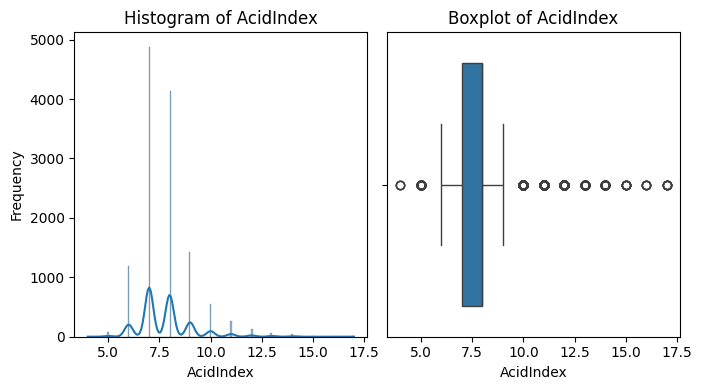

,AcidIndex
count,12795.000000
mean,7.772724
std,1.323926
min,4.000000
25%,7.000000
50%,8.000000
75%,8.000000
max,17.000000


In [288]:
# plots histogram and box plot for AcidIndex
hist_box(df,"AcidIndex")

# stats of AcidIndex
df['AcidIndex'].describe()

- The histogram reveals a right-skewed distribution for AcidIndex, indicating that there's a concentration of data points at lower values with a long tail extending towards higher values. This suggests that a majority of wines have a relatively low AcidIndex, while a smaller number have significantly higher values.
- The boxplot confirms the right-skewness, with the median (represented by the line within the box) being closer to the lower end of the distribution. The whisker extending to the right side indicates the presence of outliers or extreme values.

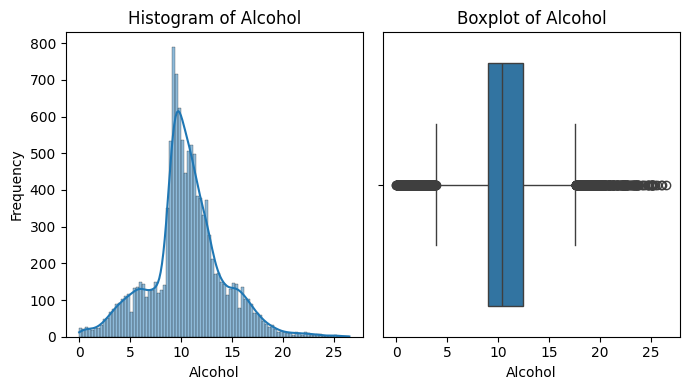

,Alcohol
count,12142.000000
mean,10.523778
std,3.629154
min,0.000000
25%,9.000000
50%,10.400000
75%,12.400000
max,26.500000


In [289]:
# plots histogram and box plot for Alcohol
hist_box(df,"Alcohol")

# stats of Alcohol
df['Alcohol'].describe()

- The histogram shows a slightly right-skewed distribution for Alcohol, indicating that there's a concentration of data points at lower values with a long tail extending towards higher values. This suggests that a majority of wines have a relatively low Alcohol content, while a smaller number have significantly higher levels.
- The boxplot confirms the right-skewness, with the median (represented by the line within the box) being closer to the lower end of the distribution. The whisker extending to the right side indicates the presence of outliers or extreme values.

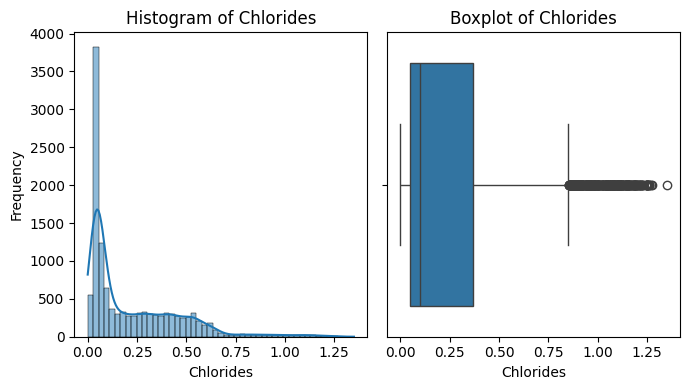

,Chlorides
count,12157.000000
mean,0.222559
std,0.234288
min,0.000000
25%,0.046000
50%,0.098000
75%,0.368000
max,1.351000


In [290]:
# plots histogram and box plot for Chlorides
hist_box(df,"Chlorides")

# stats for Chlorides
df['Chlorides'].describe()

- The histogram shows a right-skewed distribution for Chlorides, indicating that there's a concentration of data points at lower values with a long tail extending towards higher values. This suggests that a majority of wines have a relatively low Chloride content, while a smaller number have significantly higher levels.


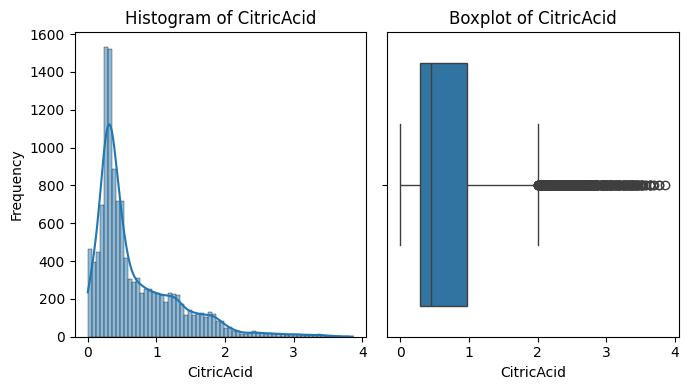

,CitricAcid
count,12795.000000
mean,0.686315
std,0.606005
min,0.000000
25%,0.280000
50%,0.440000
75%,0.970000
max,3.860000


In [291]:
# plots histogram and box plot
hist_box(df,"CitricAcid")
# stats for CitricAcid
df['CitricAcid'].describe()

- The histogram shows a right-skewed distribution for Citric Acid, indicating that there's a concentration of data points at lower values with a long tail extending towards higher values. This suggests that a majority of wines have a relatively low Citric Acid content, while a smaller number have significantly higher levels.
- With potential outliers included on upper bound side.

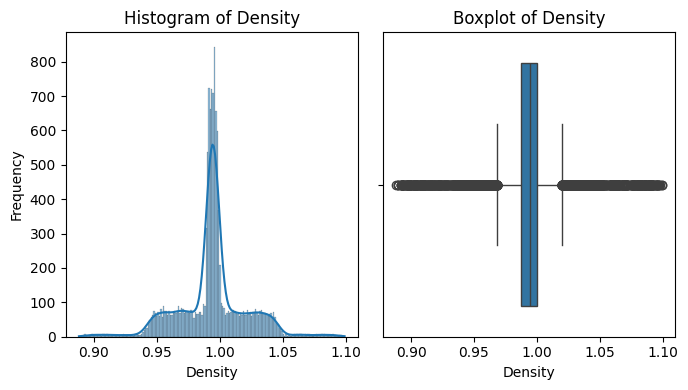

,Density
count,12795.000000
mean,0.994203
std,0.026538
min,0.888090
25%,0.987720
50%,0.994490
75%,1.000515
max,1.099240


In [292]:
# plots histogram and box plot
hist_box(df,"Density")
# stats for Density
df['Density'].describe()

- The histogram shows a nearly normal distribution for Density, with a central peak and symmetrical tails. This suggests that the majority of wines have a Density value close to the mean, with fewer wines having significantly higher or lower values.
- The peak of the histogram suggests that the most common range of Density values is between 0.95 and 1.00.
- With potential outliers included on both sides of median.

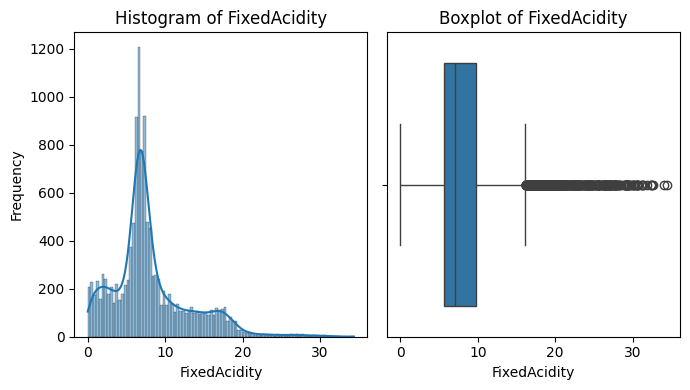

,FixedAcidity
count,12795.000000
mean,8.063251
std,4.996119
min,0.000000
25%,5.600000
50%,7.000000
75%,9.800000
max,34.400000


In [293]:
# plots histogram and box plot
hist_box(df,"FixedAcidity")
# stats for FixedAcidity
df['FixedAcidity'].describe()

- The histogram shows a right-skewed distribution for Fixed Acidity, indicating that there's a concentration of data points at lower values with a long tail extending towards higher values. This suggests that a majority of wines have a relatively low Fixed Acidity, while a smaller number have significantly higher levels.
- The peak of the histogram suggests that the most common range of Fixed Acidity values is between 5 and 10.
- With potential outliers included.

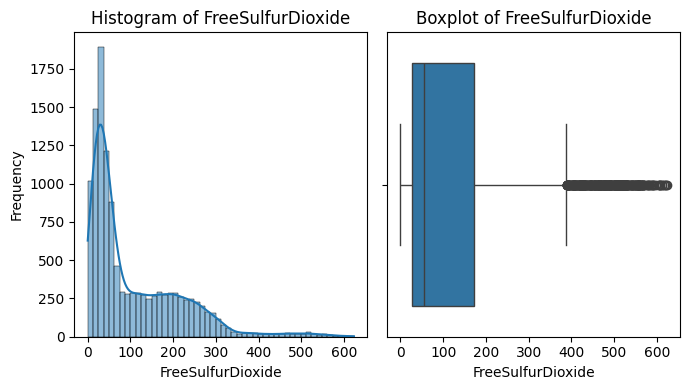

,FreeSulfurDioxide
count,12148.000000
mean,106.679042
std,108.102694
min,0.000000
25%,28.000000
50%,56.000000
75%,172.000000
max,623.000000


In [294]:
# plots histogram and box plot
hist_box(df,"FreeSulfurDioxide")
# stats for FreeSulfurDioxide
df['FreeSulfurDioxide'].describe()

- The histogram reveals a right-skewed distribution for Free Sulfur Dioxide, indicating that there's a concentration of data points at lower values with a long tail extending towards higher values. This suggests that a majority of wines have a relatively low Free Sulfur Dioxide content, while a smaller number have significantly higher levels
- With potential outliers included.

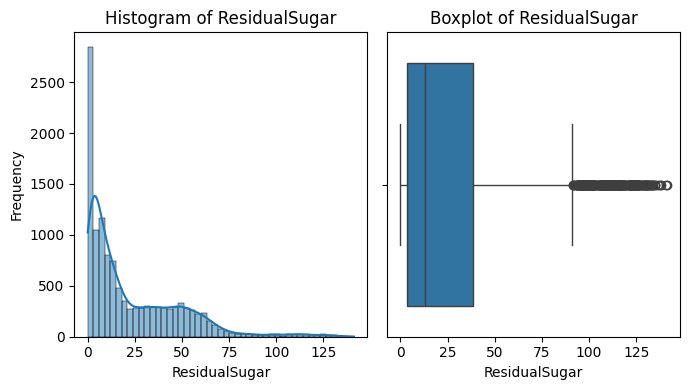

,ResidualSugar
count,12179.000000
mean,23.367809
std,24.945667
min,0.000000
25%,3.600000
50%,12.900000
75%,38.700000
max,141.150000


In [295]:
# plots histogram and box plot
hist_box(df,"ResidualSugar")
# stats for ResidualSugar
df['ResidualSugar'].describe()

- The histogram shows a right-skewed distribution for Residual Sugar, indicating that there's a concentration of data points at lower values with a long tail extending towards higher values. This suggests that a majority of wines have a relatively low Residual Sugar content, while a smaller number have significantly higher levels.

- The boxplot reveals several outliers.



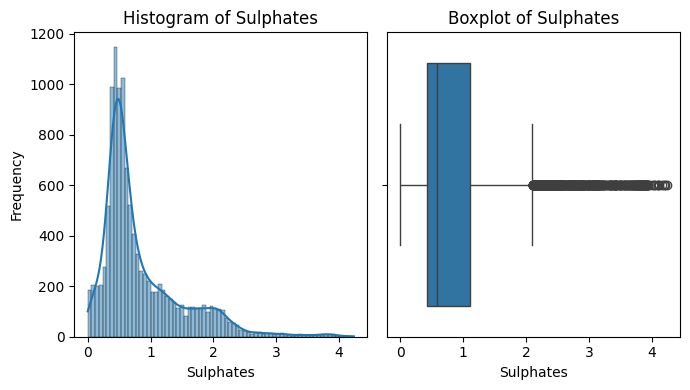

,Sulphates
count,11585.000000
mean,0.846668
std,0.655612
min,0.000000
25%,0.430000
50%,0.590000
75%,1.100000
max,4.240000


In [296]:
# plots histogram and box plot
hist_box(df,"Sulphates")
#  stats for Sulphates
df['Sulphates'].describe()

- The histogram shows a right-skewed distribution for Sulphates, indicating that there's a concentration of data points at lower values with a long tail extending towards higher values. This suggests that a majority of wines have a relatively low Sulphate content, while a smaller number have significantly higher levels.

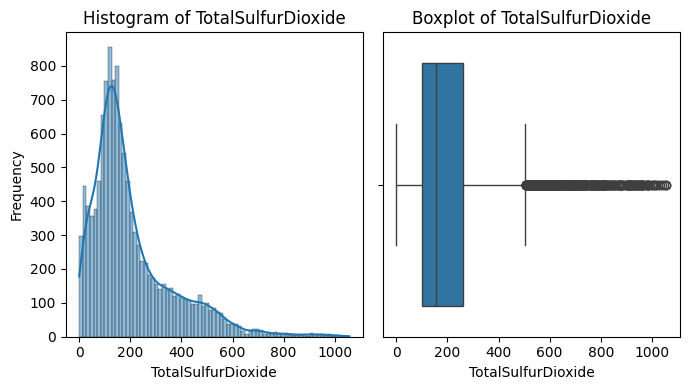

,TotalSulfurDioxide
count,12113.000000
mean,204.319120
std,163.116881
min,0.000000
25%,100.000000
50%,154.000000
75%,262.000000
max,1057.000000


In [297]:
# plots histogram and box plot
hist_box(df,"TotalSulfurDioxide")
# stats for TotalSulfurDioxide
df['TotalSulfurDioxide'].describe()

- The histogram shows a right-skewed distribution for Total Sulfur Dioxide, indicating that there's a concentration of data points at lower values with a long tail extending towards higher values. This suggests that a majority of wines have a relatively low Total Sulfur Dioxide content, while a smaller number have significantly higher levels.
- The boxplot reveals a significant number of outliers represented by the individual circles.

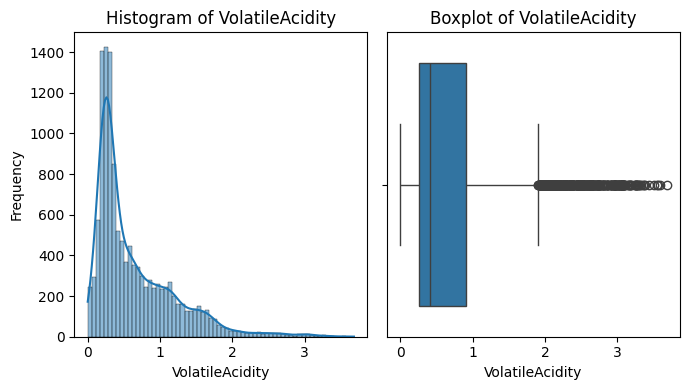

,VolatileAcidity
count,12795.000000
mean,0.641086
std,0.555614
min,0.000000
25%,0.250000
50%,0.410000
75%,0.910000
max,3.680000


In [298]:
# plots histogram and box plot
hist_box(df,"VolatileAcidity")
# stats for VolatileAcidity
df['VolatileAcidity'].describe()

 - The histogram shows a right-skewed distribution for Volatile Acidity, indicating that there's a concentration of data points at lower values with a long tail extending towards higher values. This suggests that a majority of wines have a relatively low Volatile Acidity, while a smaller number have significantly higher levels.
 - The boxplot reveals a significant number of outliers represented by the individual circles on upper bound side.

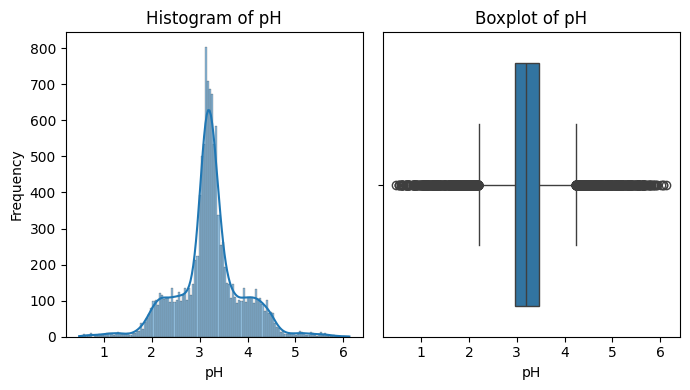

,pH
count,12400.000000
mean,3.207628
std,0.679687
min,0.480000
25%,2.960000
50%,3.200000
75%,3.470000
max,6.130000


In [299]:
# plots histogram and box plot
hist_box(df,"pH")
# stats for pH
df['pH'].describe()

- The histogram shows a nearly normal distribution for pH, with a central peak and symmetrical tails. This suggests that the majority of wines have a pH value close to the mean, with fewer wines having significantly higher or lower values.
- The boxplot reveals a significant number of outliers represented by the individual circles on both sides.

Text(0, 0.5, 'Count')

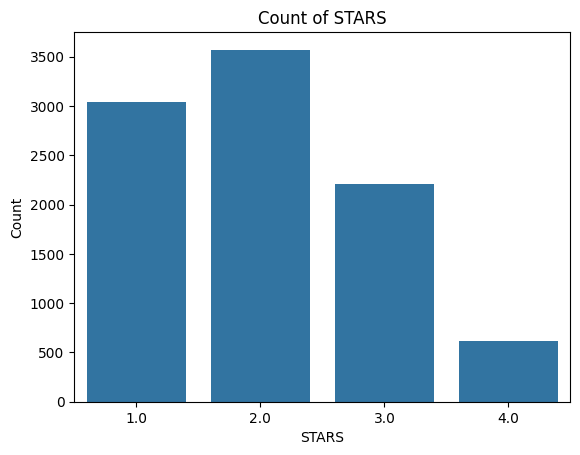

In [300]:
# countplot for STARS
sns.countplot(x='STARS', data=df)

#add title and labels
plt.title('Count of STARS')
plt.xlabel('STARS')
plt.ylabel('Count')

- The categories 1 and 2 have the highest counts, suggesting that a majority of the data points fall within these ranges.

Text(0, 0.5, 'Count')

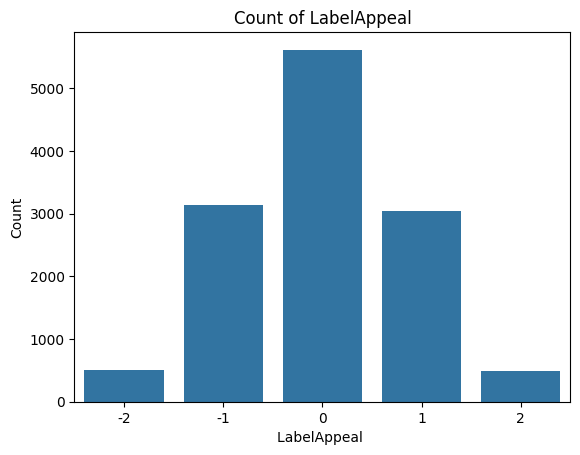

In [301]:
# countplot for LabelAppeal
sns.countplot(x='LabelAppeal', data=df)

#add title and labels
plt.title('Count of LabelAppeal')
plt.xlabel('LabelAppeal ')
plt.ylabel('Count')

- The category 0 has the highest count, suggests that a majority of consumers find the wine label appeal to be neutral or slightly positive.



## Multivariate

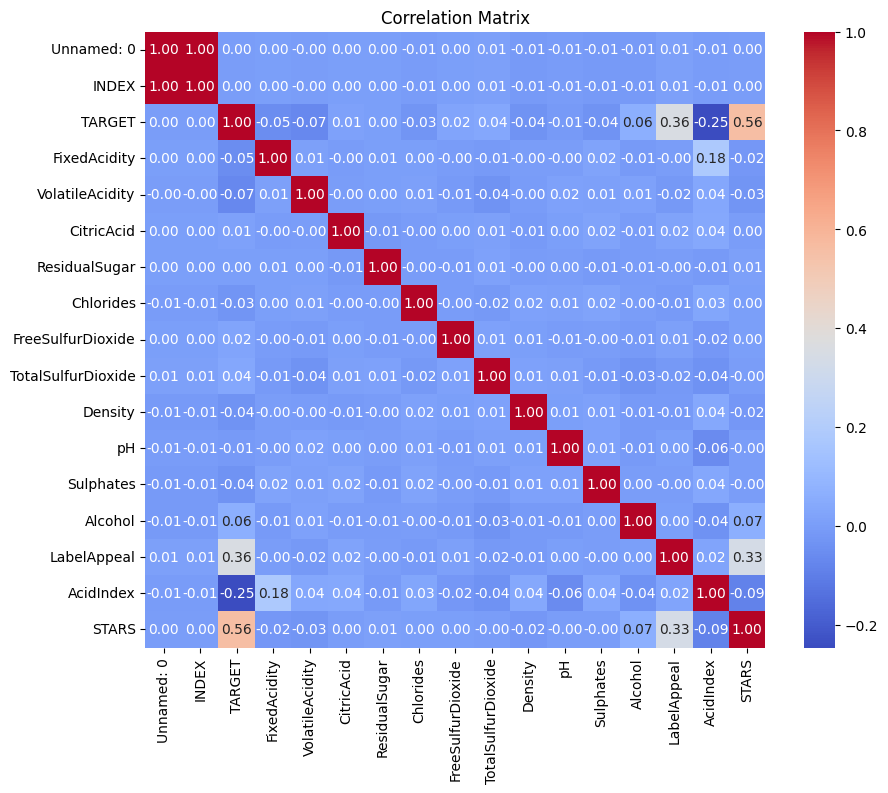

In [302]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- Based on the correlation matrix, the variables STARS and LabelAppeal have the strongest positive correlations with TARGET, suggesting that they are the most influential factors in determining the value of TARGET. Alcohol has a weak positive correlation, while the remaining variables have negligible or negative correlations.

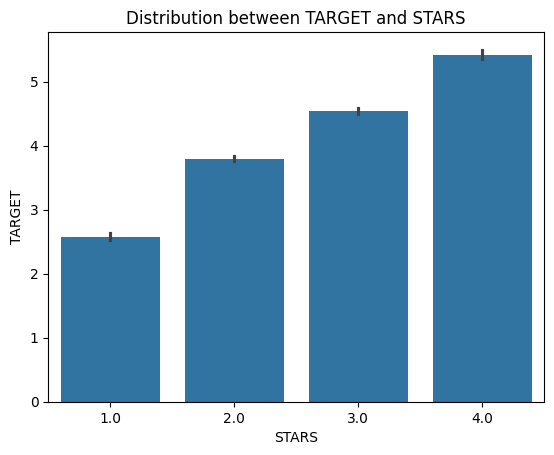

In [303]:
# barplot for STARS and TARGET
sns.barplot(df, x="STARS", y="TARGET")
plt.xlabel("STARS")
plt.ylabel("TARGET")
plt.title("Distribution between TARGET and STARS")
plt.show()

- The bar chart shows a positive relationship between TARGET (number of cases sold) and STARS (customer ratings). As STARS increase, TARGET also increases, suggesting higher ratings lead to higher sales. This indicates that customer satisfaction is a strong driver of sales in the wine industry.

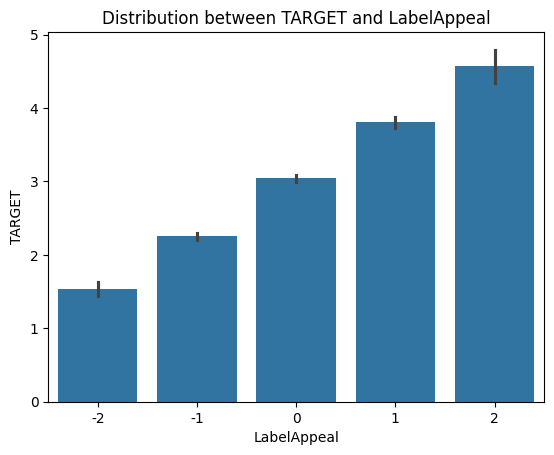

In [304]:
# barplot for LabelAppeal and TARGET
sns.barplot(df, x="LabelAppeal", y="TARGET")
plt.xlabel("LabelAppeal")
plt.ylabel("TARGET")
plt.title("Distribution between TARGET and LabelAppeal")
plt.show()

- The bars representing the average TARGET values for each LabelAppeal category exhibit a steep upward trend, indicating that wines with higher LabelAppeal ratings tend to sell significantly more cases.

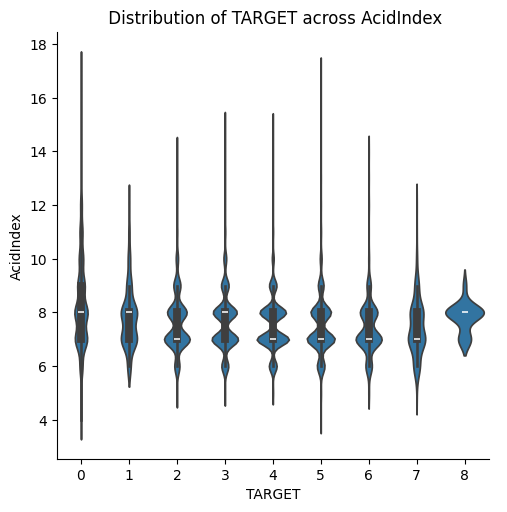

In [305]:
# violin plot for AcidIndex and TARGET
sns.catplot(df, x = "TARGET", y= "AcidIndex" ,kind = "violin")
plt.title(f" Distribution of TARGET across AcidIndex")
plt.xlabel("TARGET")
plt.ylabel("AcidIndex")
plt.show()

- The plot suggests that there is a general trend of higher TARGET values with lower AcidIndex categories, but there is also significant overlap between the distributions, indicating that the relationship is not particularly strong.

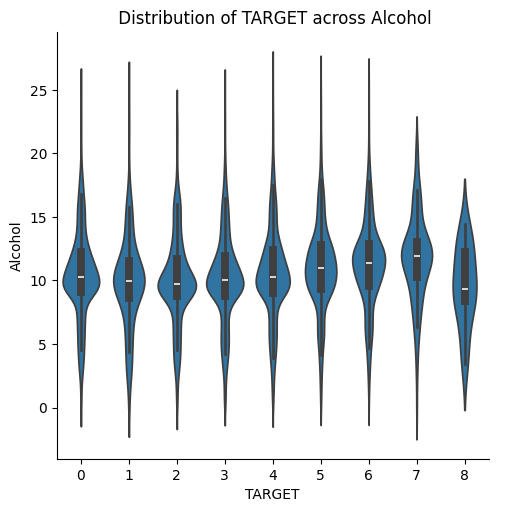

In [306]:
# violin plot for Alcohol and TARGET
sns.catplot(df, x = "TARGET", y= "Alcohol" ,kind = "violin")
plt.title(f" Distribution of TARGET across Alcohol")
plt.xlabel("TARGET")
plt.ylabel("Alcohol")
plt.show()

- The plot suggests a general trend of higher TARGET values with slighty increasing mean alcohol values.

# Data preparation

In [307]:
# sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          12795 non-null  int64  
 1   INDEX               12795 non-null  int64  
 2   TARGET              12795 non-null  int64  
 3   FixedAcidity        12795 non-null  float64
 4   VolatileAcidity     12795 non-null  float64
 5   CitricAcid          12795 non-null  float64
 6   ResidualSugar       12179 non-null  float64
 7   Chlorides           12157 non-null  float64
 8   FreeSulfurDioxide   12148 non-null  float64
 9   TotalSulfurDioxide  12113 non-null  float64
 10  Density             12795 non-null  float64
 11  pH                  12400 non-null  float64
 12  Sulphates           11585 non-null  float64
 13  Alcohol             12142 non-null  float64
 14  LabelAppeal         12795 non-null  int64  
 15  AcidIndex           12795 non-null  int64  
 16  STAR

In [308]:
# drop invalid columns
df = df.drop(columns = ['Unnamed: 0', 'INDEX'])

- dropping invalid columns ['Unnamed: 0', 'INDEX'] as they dont have any influence on data analysis and modeling.



In [309]:
# check nulls
df.isnull().sum()

,0
TARGET,0
FixedAcidity,0
VolatileAcidity,0
CitricAcid,0
ResidualSugar,616
Chlorides,638
FreeSulfurDioxide,647
TotalSulfurDioxide,682
Density,0
pH,395


In [310]:
# import the KNNimputer class
from sklearn.impute import KNNImputer

In [311]:
# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = imputer.fit_transform(df)

- After KNN imputing we need to reassign the columns to the dataframe.

In [312]:
# get column names
columns = ['TARGET', 'FixedAcidity', 'VolatileAcidity',
       'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide',
       'TotalSulfurDioxide', 'Density', 'pH', 'Sulphates', 'Alcohol',
       'LabelAppeal', 'AcidIndex', 'STARS']
df= pd.DataFrame(df, columns= columns)
df.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3.0,3.2,1.160,0.98,54.2,0.5670,119.8,268.0,0.99280,3.33,0.59,9.90,0.0,8.0,2.0
1,3.0,4.5,0.160,0.81,26.1,0.4250,15.0,327.0,1.02792,3.38,0.70,12.21,-1.0,7.0,3.0
2,5.0,7.1,2.640,0.88,14.8,0.0370,214.0,142.0,0.99518,3.12,0.48,22.00,-1.0,8.0,3.0
3,3.0,5.7,0.385,0.04,18.8,0.4250,22.0,115.0,0.99640,2.24,1.83,6.20,-1.0,6.0,1.0
4,4.0,8.0,0.330,1.26,9.4,0.0544,167.0,108.0,0.99457,3.12,1.77,13.70,0.0,9.0,2.0


In [313]:
# recheck nulls
df.isnull().sum()

,0
TARGET,0
FixedAcidity,0
VolatileAcidity,0
CitricAcid,0
ResidualSugar,0
Chlorides,0
FreeSulfurDioxide,0
TotalSulfurDioxide,0
Density,0
pH,0


- There are no null entries present in the dataset.

In [314]:
# dropping categorical variables
df_numeric = df.drop(columns = ['STARS','LabelAppeal'])
numeric_cols = df_numeric.columns
# remove outliers for numeric columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

## Post-Data Preparation EDA

## Univariate Analysis



In [315]:
# Create a copy of the DataFrame 'df' for data preparation
prep_data = df

# Print information about the DataFrame 'prep_data'
prep_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4274 entries, 0 to 12794
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TARGET              4274 non-null   float64
 1   FixedAcidity        4274 non-null   float64
 2   VolatileAcidity     4274 non-null   float64
 3   CitricAcid          4274 non-null   float64
 4   ResidualSugar       4274 non-null   float64
 5   Chlorides           4274 non-null   float64
 6   FreeSulfurDioxide   4274 non-null   float64
 7   TotalSulfurDioxide  4274 non-null   float64
 8   Density             4274 non-null   float64
 9   pH                  4274 non-null   float64
 10  Sulphates           4274 non-null   float64
 11  Alcohol             4274 non-null   float64
 12  LabelAppeal         4274 non-null   float64
 13  AcidIndex           4274 non-null   float64
 14  STARS               4274 non-null   float64
dtypes: float64(15)
memory usage: 534.2 KB


In [316]:
# Get summary statistics for the DataFrame 'prep_data'
prep_data.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000
mean,3.209640,6.825082,0.580656,0.611802,21.607244,0.198698,98.563056,178.261816,0.994020,3.213604,0.700236,10.604196,-0.007955,7.488067,2.021759
std,1.856429,3.466076,0.452019,0.480075,20.988614,0.190448,87.810732,112.590544,0.008547,0.434661,0.416678,2.594121,0.902674,0.839005,0.823607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.969610,2.170000,0.000000,4.300000,-2.000000,6.000000,1.000000
25%,2.000000,5.200000,0.240000,0.280000,4.000000,0.045000,30.000000,103.000000,0.991000,3.030000,0.420000,9.200000,-1.000000,7.000000,1.200000
50%,4.000000,6.700000,0.380000,0.410000,13.200000,0.098000,58.250000,151.000000,0.994045,3.200000,0.570000,10.500000,0.000000,7.000000,2.000000
75%,5.000000,8.000000,0.870000,0.890000,35.900000,0.333000,157.000000,229.000000,0.997280,3.413500,0.900000,12.100000,1.000000,8.000000,2.400000
max,7.000000,16.100000,1.910000,2.000000,87.800000,0.818000,382.000000,499.000000,1.018550,4.250000,1.940000,17.100000,2.000000,9.000000,4.000000


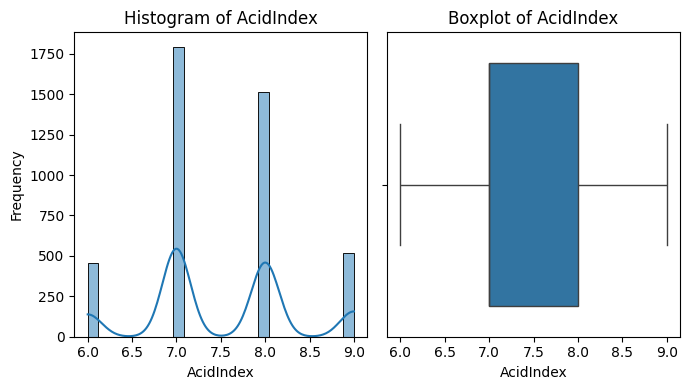

,AcidIndex
count,4274.000000
mean,7.488067
std,0.839005
min,6.000000
25%,7.000000
50%,7.000000
75%,8.000000
max,9.000000


In [317]:
# plots hist and box plot
hist_box(prep_data,"AcidIndex")

prep_data['AcidIndex'].describe()

- The histogram shows a bimodal distribution for AcidIndex, indicating that there are two distinct peaks in the data. This suggests that there might be two main groups or clusters of wines with different AcidIndex values.

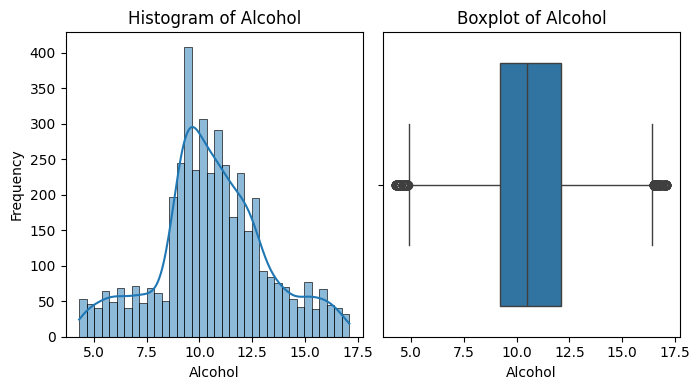

,Alcohol
count,4274.000000
mean,10.604196
std,2.594121
min,4.300000
25%,9.200000
50%,10.500000
75%,12.100000
max,17.100000


In [318]:
# plots hist and box plot
hist_box(prep_data,"Alcohol")

prep_data['Alcohol'].describe()

- The histogram and boxplot for Alcohol closely resemble a normal distribution.

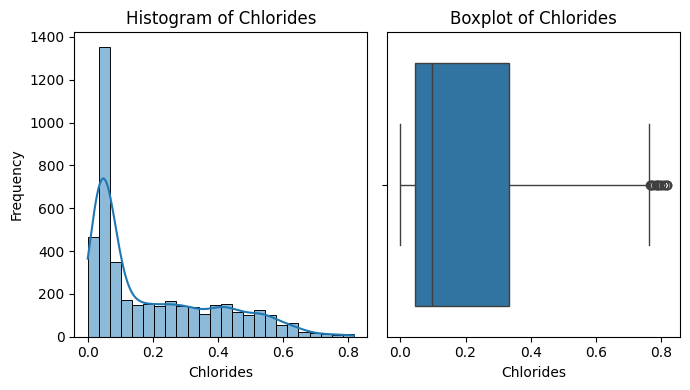

,Chlorides
count,4274.000000
mean,0.198698
std,0.190448
min,0.000000
25%,0.045000
50%,0.098000
75%,0.333000
max,0.818000


In [319]:
# plots hist and box plot
hist_box(prep_data,"Chlorides")

prep_data['Chlorides'].describe()

- The histogram shows a right-skewed distribution for Chlorides, indicating that there's a concentration of data points at lower values with a long tail extending towards higher values. This suggests that a majority of wines have a relatively low Chloride content, while a smaller number have significantly higher levels.
- The boxplot reveals a single outlier represented by the individual circle.

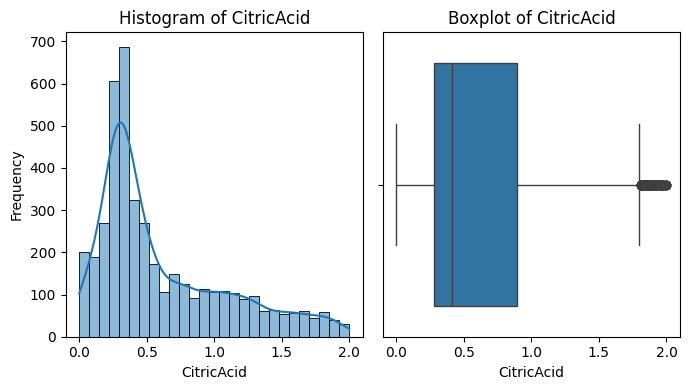

,CitricAcid
count,4274.000000
mean,0.611802
std,0.480075
min,0.000000
25%,0.280000
50%,0.410000
75%,0.890000
max,2.000000


In [320]:
# plots hist and box plot
hist_box(prep_data,"CitricAcid")

prep_data['CitricAcid'].describe()

- The histogram shows a right-skewed distribution for Citric Acid, indicating that there's a concentration of data points at lower values with a long tail extending towards higher values. This suggests that a majority of wines have a relatively low Citric Acid content, while a smaller number have significantly higher levels.

- The boxplot reveals a single outlier represented by the individual circle. This outlier suggests that there is one wine with a Citric Acid level that is significantly different from the majority of the data, potentially indicating an exceptional or unusual winemaking practice.

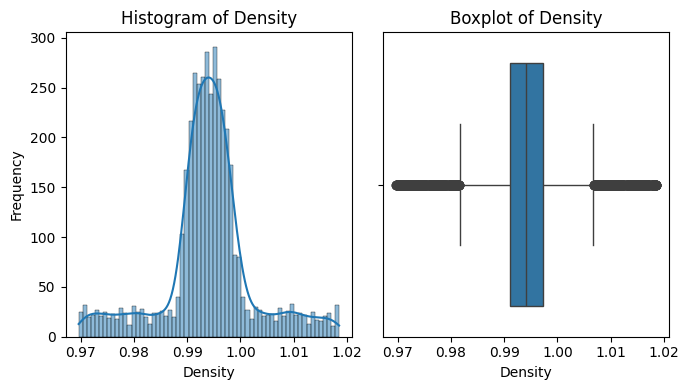

,Density
count,4274.000000
mean,0.994020
std,0.008547
min,0.969610
25%,0.991000
50%,0.994045
75%,0.997280
max,1.018550


In [321]:
# plots hist and box plot
hist_box(prep_data,"Density")

prep_data['Density'].describe()

- The histogram shows a nearly normal distribution for Density, with a central peak and symmetrical tails. This suggests that the majority of wines have a Density value close to the mean, with fewer wines having significantly higher or lower values.
- There are a significant number of outliers, suggesting that while most wines have a Density value close to the average, there are a few exceptional wines with significantly higher or lower values.


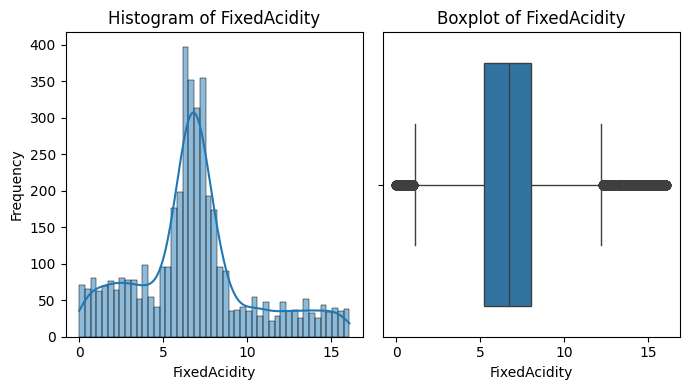

,FixedAcidity
count,4274.000000
mean,6.825082
std,3.466076
min,0.000000
25%,5.200000
50%,6.700000
75%,8.000000
max,16.100000


In [322]:
# plots hist and box plot
hist_box(prep_data,"FixedAcidity")

prep_data['FixedAcidity'].describe()

- The histogram and boxplot for Fixed Acidity closely resemble a normal distribution.

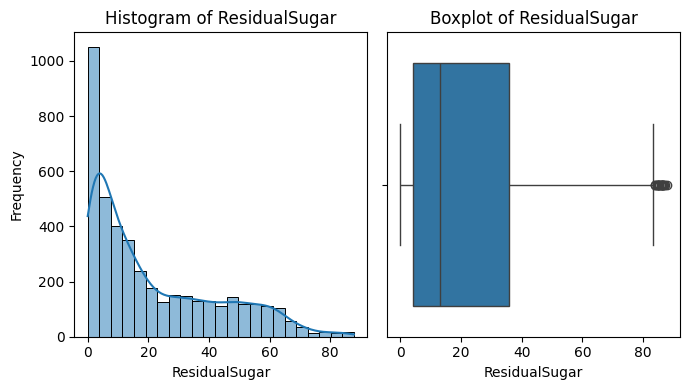

,ResidualSugar
count,4274.000000
mean,21.607244
std,20.988614
min,0.000000
25%,4.000000
50%,13.200000
75%,35.900000
max,87.800000


In [323]:
# plots hist and box plot
hist_box(prep_data,"ResidualSugar")

prep_data['ResidualSugar'].describe()

- The histogram shows a right-skewed distribution for Residual Sugar, indicating that there's a concentration of data points at lower values with a long tail extending towards higher values. This suggests that a majority of wines have a relatively low Residual Sugar content, while a smaller number have significantly higher levels.

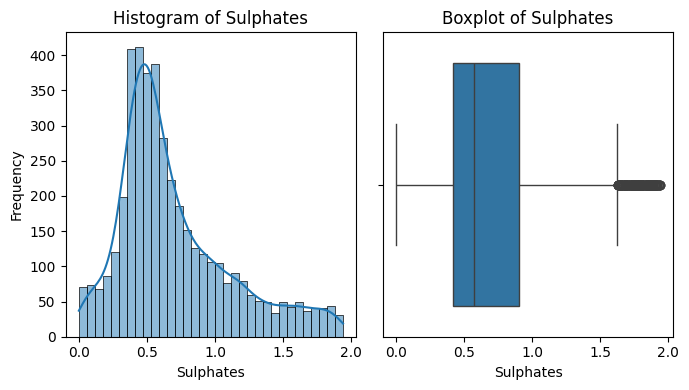

,Sulphates
count,4274.000000
mean,0.700236
std,0.416678
min,0.000000
25%,0.420000
50%,0.570000
75%,0.900000
max,1.940000


In [324]:
# plots hist and box plot
hist_box(prep_data,"Sulphates")

prep_data['Sulphates'].describe()

- Overall, both the histogram and boxplot indicate a right-skewed distribution for Sulphates with a concentration of data points at lower values and a single outlier. This suggests that while most wines have a relatively low Sulphate content, there is one exceptional wine with a much higher level.

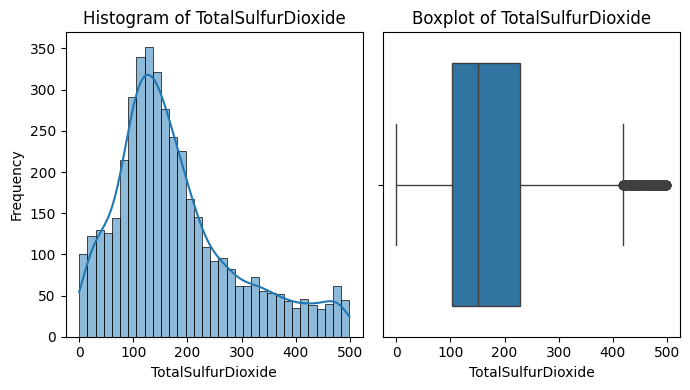

,TotalSulfurDioxide
count,4274.000000
mean,178.261816
std,112.590544
min,0.000000
25%,103.000000
50%,151.000000
75%,229.000000
max,499.000000


In [325]:
# plots hist and box plot
hist_box(prep_data,"TotalSulfurDioxide")

prep_data['TotalSulfurDioxide'].describe()

- Both the histogram and boxplot indicate a right-skewed distribution for Total Sulfur Dioxide with a concentration of data points at lower values and a significant number of outliers. This suggests that while most wines have a relatively low Total Sulfur Dioxide content, there are a few exceptional wines with much higher levels.

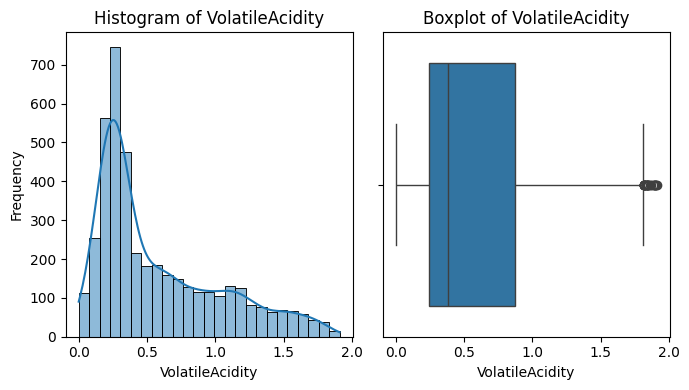

,VolatileAcidity
count,4274.000000
mean,0.580656
std,0.452019
min,0.000000
25%,0.240000
50%,0.380000
75%,0.870000
max,1.910000


In [326]:
# plots hist and box plot
hist_box(prep_data,"VolatileAcidity")

prep_data['VolatileAcidity'].describe()

-  Both the histogram and boxplot indicate a right-skewed distribution for Volatile Acidity with a concentration of data points at lower values and a single outlier. This suggests that while most wines have a relatively low Volatile Acidity content, there is one exceptional wine with a much higher level.

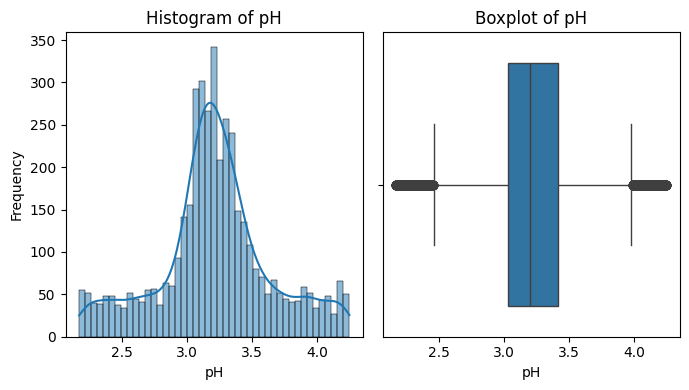

,pH
count,4274.000000
mean,3.213604
std,0.434661
min,2.170000
25%,3.030000
50%,3.200000
75%,3.413500
max,4.250000


In [327]:
# plots hist and box plot
hist_box(prep_data,"pH")

prep_data['pH'].describe()

- The histogram and boxplot show a nearly normal distribution for pH with a concentration of data points around the median value. There are a few outliers present.

Text(0, 0.5, 'Count')

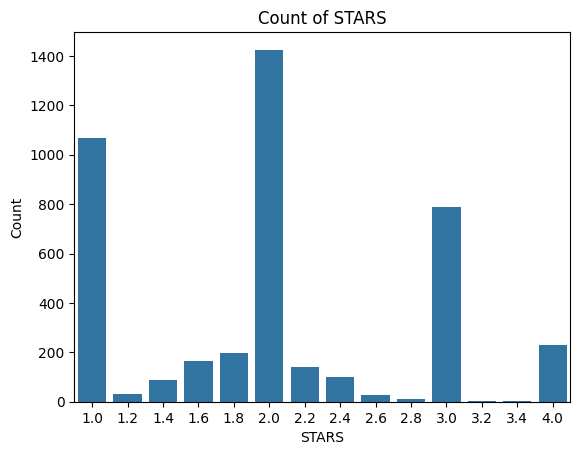

In [328]:
# count plot for STARS
sns.countplot(x='STARS', data= prep_data)

#add title and labels
plt.title('Count of STARS')
plt.xlabel('STARS')
plt.ylabel('Count')

- The category 2.0 has the highest count, suggesting that the majority of the data points fall within this range.

Text(0, 0.5, 'Count')

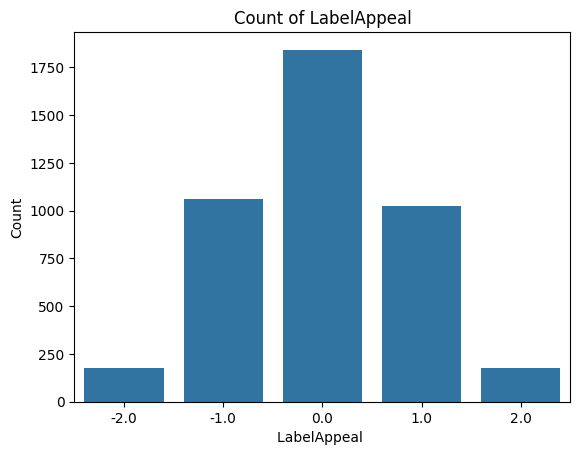

In [329]:
# countplot for LabelAppeal
sns.countplot(x='LabelAppeal', data=prep_data)

#add title and labels
plt.title('Count of LabelAppeal')
plt.xlabel('LabelAppeal ')
plt.ylabel('Count')

- The category 0 has the highest count, suggesting that the majority of the data points fall within this range.
- The categories -2 and 2 have relatively low counts, indicating that they might be considered outliers or less common values.


## Multivariate

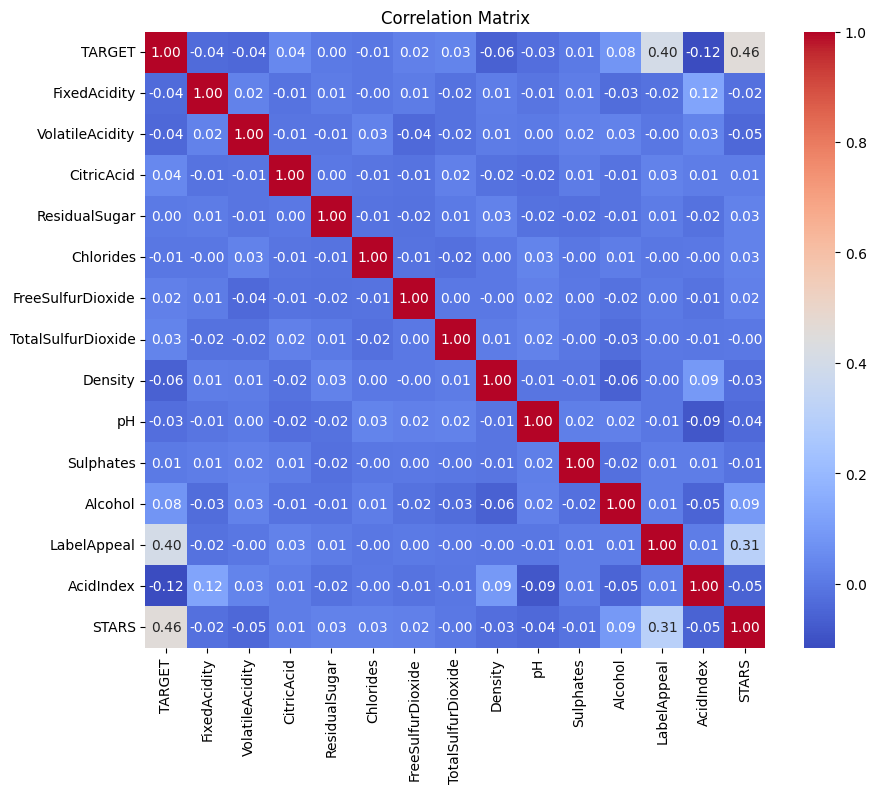

In [330]:
# Compute the correlation matrix
correlation_matrix = prep_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- The variables STARS and LabelAppeal have the strongest positive correlations with TARGET, according to the correlation matrix, indicating that they have the greatest influence over TARGET's value. The remaining factors show minimal or negative relationships, with alcohol showing a slight positive association.

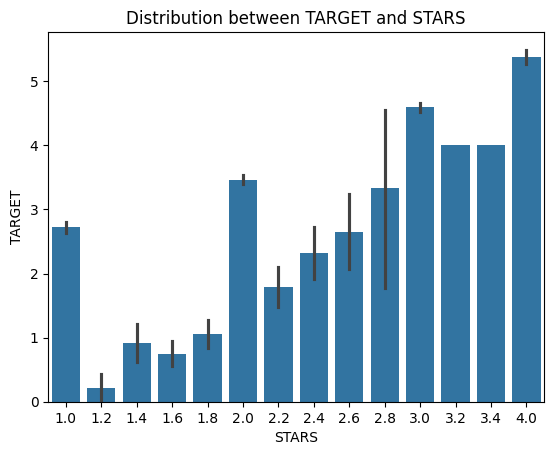

In [331]:
# Plots bar chart
sns.barplot(prep_data, x="STARS", y="TARGET")
plt.xlabel("STARS")
plt.ylabel("TARGET")
plt.title("Distribution between TARGET and STARS")
plt.show()

- The bar graph indicates that TARGET (number of cases sold) and STARS (customer ratings) have a positive correlation. Target rises in tandem with STARS, indicating that higher ratings translate into more sales. This suggests that in the wine industry, sales are significantly influenced by consumer happiness.

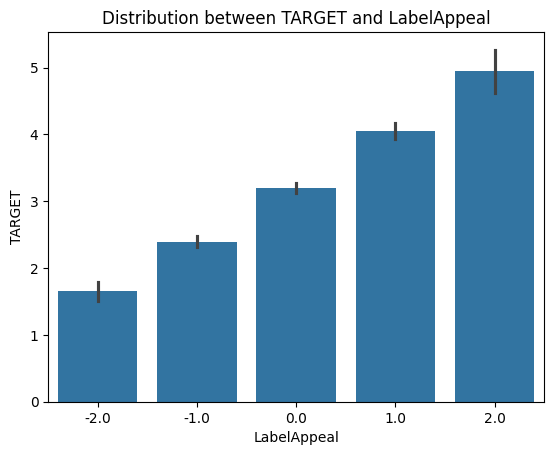

In [332]:
# plots barplot
sns.barplot(prep_data, x="LabelAppeal", y="TARGET")
plt.xlabel("LabelAppeal")
plt.ylabel("TARGET")
plt.title("Distribution between TARGET and LabelAppeal")
plt.show()

-  Each LabelAppeal category's average TARGET value is shown by bars that show a sharp upward trend, suggesting that wines with higher LabelAppeal ratings often sell far more cases.

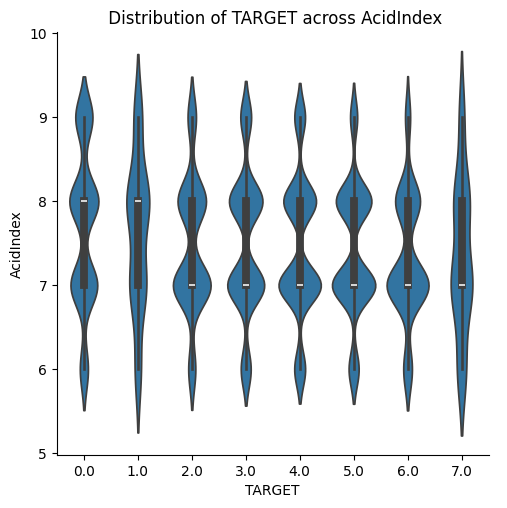

In [333]:
# plots violen plot
sns.catplot(prep_data, x = "TARGET", y= "AcidIndex" ,kind = "violin")
plt.title(f" Distribution of TARGET across AcidIndex")
plt.xlabel("TARGET")
plt.ylabel("AcidIndex")
plt.show()

- The graph shows clear details as there are no null values than the pre- data preparation EDA with same trend.

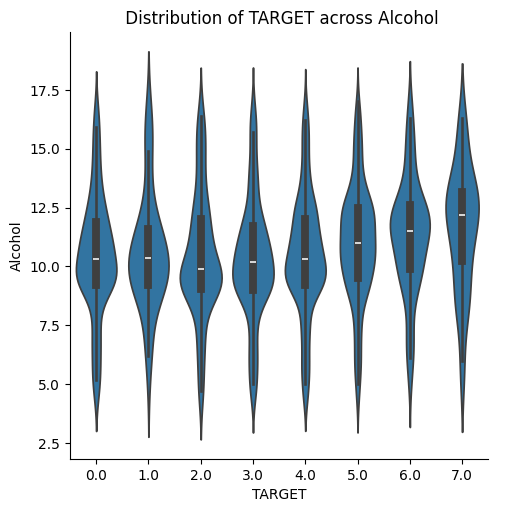

In [334]:
# violen plot
sns.catplot(prep_data, x = "TARGET", y= "Alcohol" ,kind = "violin")
plt.title(f" Distribution of TARGET across Alcohol")
plt.xlabel("TARGET")
plt.ylabel("Alcohol")
plt.show()

- The graph shows clear details as there are no null values than the pre- data preparation EDA with same trend.

## Final Data Preparation for Model Readiness

In [335]:
# Dimentionality reduction.
# drops unwanted columns
drope_columns = ['FreeSulfurDioxide','ResidualSugar','Chlorides','pH','FixedAcidity','VolatileAcidity']
prep_data = prep_data.drop(columns = drope_columns)

From the observations of above EDA we can do some dimensionality reduction on following reasons:

- dropping FreeSulfurDioxide as it is having similar correaltion to TotalSulfurDioxide.

- dropping Columns with low and neglegible corelations like:
 ResidualSugar, Chlorides, pH.

- dropping FixedAcidity and VolatileAcidity because AcidIndex is weighted average of FixedAcidity and VolatileAcidity.
**source** : [Types of acidity: volatile acidity and fixed acidity](https://agrovin.com/en/techniques-for-correcting-wine-acidity/)

# Conclusions

- We can see the clear graphs after doing data preparation as we eliminated all the outliers and imputed the missing and null values

- we also droped some columns as dimensionality reduction process

- The final dataset is ready to give as input to a predective model.